# PART A
## 1. Data Understanding & Exploration: [5 Marks]
### A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable. [1 Mark]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True) # adds a nice background to the graphs
import os
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
car_name=pd.read_csv("Car name.csv")
car_name.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [3]:
car_name.shape

(398, 1)

In [4]:
car_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car_name  398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable. [1 Mark]

In [5]:
car_attribute=pd.read_json("Car-Attributes.json")
car_attribute.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
car_attribute.shape

(398, 8)

In [7]:
car_attribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


### C. Merge both the DataFrames together to form a single DataFrame [2 Mark]

In [8]:
car_df=pd.merge(car_name,car_attribute,left_index=True, right_index=True)
car_df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [9]:
car_df.tail()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1
397,chevy s-10,31.0,4,119.0,82,2720,19.4,82,1


In [10]:
car_df.shape

(398, 9)

In [11]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [12]:
car_df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### D. Print 5 point summary of the numerical features and share insights. [1 Marks]

In [13]:
# Function to Calculate 5-point summary for all numeric fields
def num_stats(df,num_list):
    stat_dict_list=[]
    for cols in num_list:
        quartiles=np.percentile(df[cols], [25, 50, 75])
        min_val=df[cols].min()
        max_val=df[cols].max()
        stat_dict={}
        stat_dict['Col_name']=cols
        stat_dict['min_val']=min_val
        stat_dict['Q1_val']=quartiles[0]
        stat_dict['Q2_median_val']=quartiles[1]
        stat_dict['Q3_val']=quartiles[2]
        stat_dict['max_val']=max_val
        stat_dict_list.append(stat_dict)
        
    stats_df=pd.DataFrame(stat_dict_list)
    return stats_df

In [14]:
# calling the function to prepare 5-point summary 
# As per the data types in car_df.info()
num_list=['mpg','cyl','disp','wt','acc','yr','origin']
stats_df=num_stats(car_df,num_list)
stats_df=stats_df.set_index('Col_name').T
stats_df.head(10)

Col_name,mpg,cyl,disp,wt,acc,yr,origin
min_val,9.0,3.0,68.00,1613.00,8.000,70.0,1.0
Q1_val,17.5,4.0,104.25,2223.75,13.825,73.0,1.0
Q2_median_val,23.0,4.0,148.50,2803.50,15.500,76.0,1.0
Q3_val,29.0,8.0,262.00,3608.00,17.175,79.0,2.0
max_val,46.6,8.0,455.00,5140.00,24.800,82.0,3.0


In [15]:
car_df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


#### Insights: 
- mpg:
    Mean=23.514573 and median=23.00. Mean and Median are approximately equal.
- cyl:
    Q1=4 and Q2=4. Similarly Q3=8 and max value=8. 50% of the data has value less than or equal to 4. 
- disp:
    Max value is 455.00 and 75% of the values are below 262.00. There are outliers in this feature.
- wt:
    Mean=2970.424623 and Median=2803.500000. Mean and Median are closer. 
- acc:
    Mean=15.568090 and Median=15.500000. Mean and Median are approximately equal. 
- yr:
    Mean=76.010050 and Median=76.000000. Mean and Median are approximately equal. The data seems to be equally distributed.
- origin:
    50% of the data has value 1. So the data may be skewed on this feature.

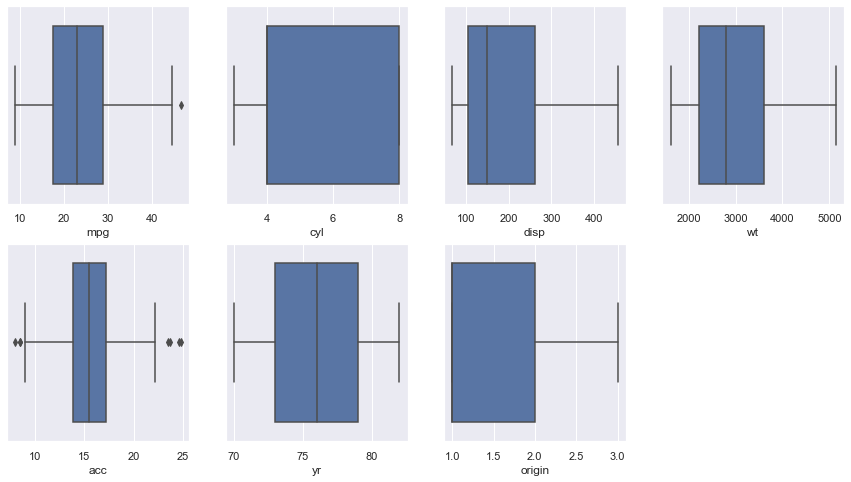

In [16]:
# Pictorial representation of 5-point summary using box plot
plt.figure(figsize=(15,8))

x = 1
for col in num_list:
    plt.subplot(2,4,x)
    sns.boxplot(data=car_df,x=col)
    x += 1

## 2. Data Preparation & Analysis: [10 Marks] 
### A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach. [2 Marks]

In [17]:
# Quick check on null values
for cols in car_df.columns:
    print("Number of null values for {0} cols is {1}".format(cols,car_df[cols].isnull().sum()))

Number of null values for car_name cols is 0
Number of null values for mpg cols is 0
Number of null values for cyl cols is 0
Number of null values for disp cols is 0
Number of null values for hp cols is 0
Number of null values for wt cols is 0
Number of null values for acc cols is 0
Number of null values for yr cols is 0
Number of null values for origin cols is 0


In [18]:
# feature-wise percentage of missing values present in the data
def find_missing(df):
    null_percentage=[{col : df[col].isnull().sum()*100/len(df)} for col in df.columns]
    for x in null_percentage:
        for k,v in x.items():
            print("Column name: {0} ; missing percentage : {1}".format(k,v))


In [19]:
find_missing(car_df)

Column name: car_name ; missing percentage : 0.0
Column name: mpg ; missing percentage : 0.0
Column name: cyl ; missing percentage : 0.0
Column name: disp ; missing percentage : 0.0
Column name: hp ; missing percentage : 0.0
Column name: wt ; missing percentage : 0.0
Column name: acc ; missing percentage : 0.0
Column name: yr ; missing percentage : 0.0
Column name: origin ; missing percentage : 0.0


##### Insights: <br>There are no null values in any car_df column. All columns show 0 precentage for missing value. No imputation needed for missing values. <br> However, when seeing the sample data, the column 'hp' has numerical value but has data type as object. There may be some non-numeric value in this 'hp' column. This is covered in question H.

### B. Check for duplicate values in the data and impute with the best suitable approach. [1 Mark]

In [20]:
# Finding duplicate values 
def get_value_counts(df):
    for cols in df.columns:
        print("\nUnique values and its counts for {}".format(cols))
        print(df[cols].value_counts())
        print("\n*********************************************")

In [21]:
get_value_counts(car_df)


Unique values and its counts for car_name
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: car_name, Length: 305, dtype: int64

*********************************************

Unique values and its counts for mpg
13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: mpg, Length: 129, dtype: int64

*********************************************

Unique values and its counts for cyl
4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64

*********************************************

Unique values and its counts for disp
97.0     21
98.0     18
350.0    18
318.0    17
250.0    17
         ..
104.0     1
110.0     1
130.0     1
111.0     1
144.0     1
Name: disp, Length: 82, d

#### Insights: 
- car_name has many duplicates and this column is not needed. We can drop this column. 
- The origin column has only 3 distinct values, we can perform one-hot encoding for origin.
- Instead of year, age of the vehicle will make more sense. Since max year is 82, age can be calculated from 83. Also mpg has higher value as the year increases, meaning newer the vehicle more the mpg.

In [22]:
origin_one_hot = pd.get_dummies(car_df['origin'])
origin_one_hot = origin_one_hot.add_prefix('origin_')
# merge car_df and origin_one_hot
car_df = car_df.join(origin_one_hot)
car_df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,origin_1,origin_2,origin_3
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,1,0,0
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,1,0,0
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,1,0,0
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,1,0,0
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1,1,0,0


In [23]:
# Calculate age of vehicle from 83. Since max year is 82, age can be calculated from 83.
car_df['age'] = 83-car_df['yr']
car_df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,origin_1,origin_2,origin_3,age
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,1,0,0,13
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,1,0,0,13
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,1,0,0,13
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,1,0,0,13
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1,1,0,0,13


In [24]:
car_df=car_df.drop(['car_name','origin', 'yr'], axis =1)

In [25]:
car_df.head()

,mpg,cyl,disp,hp,wt,acc,origin_1,origin_2,origin_3,age
0,18.0,8,307.0,130,3504,12.0,1,0,0,13
1,15.0,8,350.0,165,3693,11.5,1,0,0,13
2,18.0,8,318.0,150,3436,11.0,1,0,0,13
3,16.0,8,304.0,150,3433,12.0,1,0,0,13
4,17.0,8,302.0,140,3449,10.5,1,0,0,13


### C. Plot a pairplot for all features. [1 Marks]

<Figure size 1080x720 with 0 Axes>

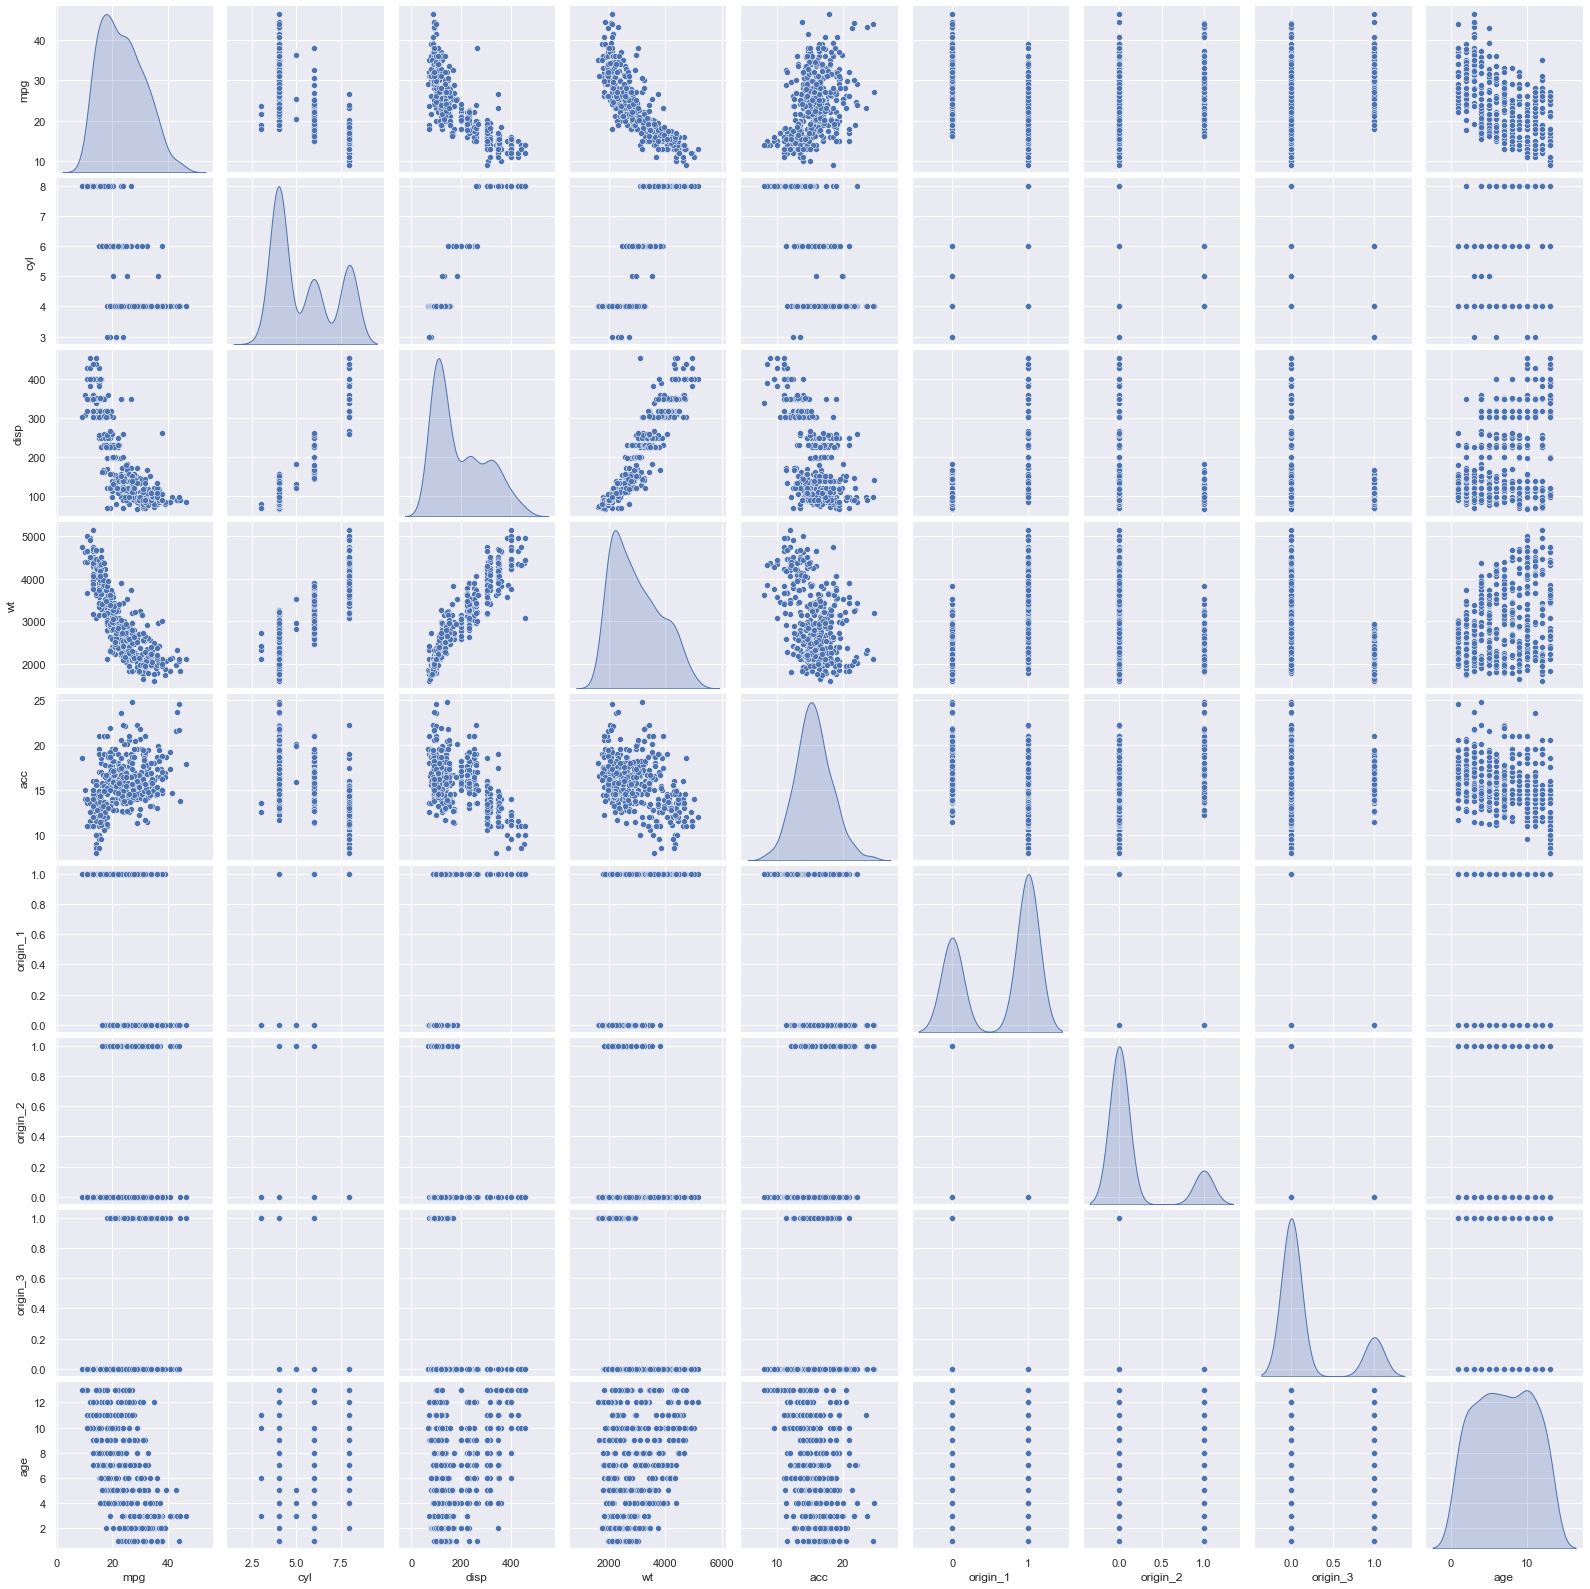

In [26]:
#Pairplot for all numerical fields
plt.figure(figsize=(15,10))
sns.pairplot(car_df,diag_kind='kde',palette='flare')

### D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. [1 Marks]

<Figure size 1080x720 with 0 Axes>

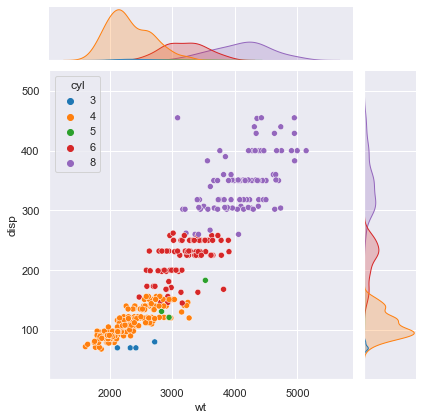

In [27]:
#joint plot for ‘wt’ and ‘disp’, distinguishable by ‘cyl’
plt.figure(figsize=(15,10))
sns.jointplot(data=car_df, x="wt", y="disp", hue="cyl", palette='tab10')

### E. Share insights for Q2.d. [1 Marks]

#### Insights:
- As weight increases, displacement also increases.
- As the number of cylinders increases, the rate at which displacement increases with weight also increases. i.e with 3 or 4  cylinders, when weight increases displacement increases from ~65 to ~150. Whereas with 8 cylinders, when weight increases displacement increases from ~260 to ~460
- Also more the cylinders, more the weight of the vehicle, more the displacement.


### F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’. [1 Marks]

<Figure size 1080x720 with 0 Axes>

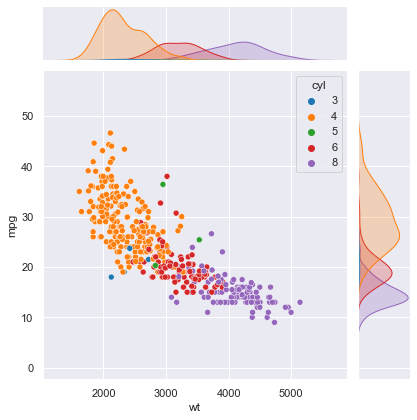

In [28]:
#joint plot for ‘wt’ and ‘mpg’, distinguishable by ‘cyl’
plt.figure(figsize=(15,10))
sns.jointplot(data=car_df, x="wt", y="mpg", hue="cyl", palette='tab10')

### G. Share insights for Q2.f. [1 Marks]

#### Insights:
- As weight increases, miles per gallon decreases. More heavier the vehicle, less the mileage. 
- As the number of cylinders increases, the rate at which mileage decreases with weight decreases. i.e with 3 or 4  cylinders, when weight increases mileage decreases from ~47 to ~18. Whereas with 8 cylinders, when weight increases mileage decreases from ~25 to ~9
- Also more the cylinders, more the weight of the vehicle, but lesser the mileage.

### H. Check for unexpected values in all the features and datapoints with such values. [2 Marks]

In [29]:
# Finding if there are any non-numeric values in numeric fields
def find_nonnum_val(df):
    col_list=df.columns
    print(col_list)
    for cols in col_list[1:]:
        print("****************************************")
        print("Column Name : {}".format(cols))
        print(df[pd.to_numeric(df[cols], errors='coerce').isnull()])
        print("****************************************")

In [30]:
find_nonnum_val(car_df)

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'origin_1', 'origin_2',
       'origin_3', 'age'],
      dtype='object')
****************************************
Column Name : cyl
Empty DataFrame
Columns: [mpg, cyl, disp, hp, wt, acc, origin_1, origin_2, origin_3, age]
Index: []
****************************************
****************************************
Column Name : disp
Empty DataFrame
Columns: [mpg, cyl, disp, hp, wt, acc, origin_1, origin_2, origin_3, age]
Index: []
****************************************
****************************************
Column Name : hp
      mpg  cyl   disp hp    wt   acc  origin_1  origin_2  origin_3  age
32   25.0    4   98.0  ?  2046  19.0         1         0         0   12
126  21.0    6  200.0  ?  2875  17.0         1         0         0    9
330  40.9    4   85.0  ?  1835  17.3         0         1         0    3
336  23.6    4  140.0  ?  2905  14.3         1         0         0    3
354  34.5    4  100.0  ?  2320  15.8         0         1    

##### Insight: The column 'hp' has non-numeric value '?'. To impute with suitable values, we need to understand how the data is distributed. 

In [31]:
# Get all records which do not have '?' values in 'hp'
car_df1=car_df.loc[car_df['hp'] != '?']
car_df1=car_df1.astype({'hp':'int64'})
car_df1.shape

(392, 10)

C:\Users\srile\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hp', ylabel='Density'>

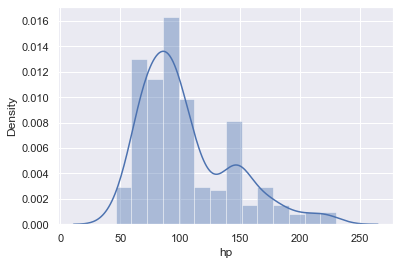

In [32]:
sns.distplot(car_df1['hp'])

#### Insight: The data does not look to be normally distributed. So we can impute with median value.

In [33]:
car_df.replace("?",np.nan, inplace=True)
car_df['hp'].fillna((car_df['hp'].median()), inplace=True)
car_df['hp'] = car_df['hp'].astype('int64')

In [34]:
print(car_df.loc[car_df['hp'] == '?'])

Empty DataFrame
Columns: [mpg, cyl, disp, hp, wt, acc, origin_1, origin_2, origin_3, age]
Index: []


In [35]:
car_df.describe()

,mpg,cyl,disp,hp,wt,acc,origin_1,origin_2,origin_3,age
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.296482,2970.424623,15.568090,0.625628,0.175879,0.198492,6.989950
std,7.815984,1.701004,104.269838,38.224809,846.841774,2.757689,0.484569,0.381197,0.399367,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,0.000000,0.000000,0.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,0.000000,0.000000,0.000000,4.000000
50%,23.000000,4.000000,148.500000,93.000000,2803.500000,15.500000,1.000000,0.000000,0.000000,7.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,1.000000,0.000000,0.000000,10.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,1.000000,1.000000,1.000000,13.000000


## 3. Clustering: [15 Marks] 
### A. Apply K-Means clustering for 2 to 10 clusters. [3 Marks]

In [36]:
# Before applying K-means clustering, we need to scale the variables.
from scipy.stats import zscore
# Collecting all numerical columns
num_cols = car_df.select_dtypes(include=[np.int64, np.float64]).columns
print("Numerical columns are : {}".format(num_cols))
car_scaled=car_df.copy()
car_scaled[num_cols] =car_scaled[num_cols].apply(zscore)
car_scaled

#Another way of scaling using standardscaler. However for this projevct we will go with zscore.
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#car_scaled = scaler.fit_transform(car_df)
#car_scaled

Numerical columns are : Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'age'], dtype='object')


,mpg,cyl,disp,hp,wt,acc,origin_1,origin_2,origin_3,age
0,-0.706439,1.498191,1.090604,0.673277,0.630870,-1.295498,1,0,0,1.627426
1,-1.090751,1.498191,1.503514,1.590065,0.854333,-1.477038,1,0,0,1.627426
2,-0.706439,1.498191,1.196232,1.197156,0.550470,-1.658577,1,0,0,1.627426
3,-0.962647,1.498191,1.061796,1.197156,0.546923,-1.295498,1,0,0,1.627426
4,-0.834543,1.498191,1.042591,0.935216,0.565841,-1.840117,1,0,0,1.627426
...,...,...,...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.479257,-0.213324,0.011586,1,0,0,-1.621983
394,2.624265,-0.856321,-0.925936,-1.369851,-0.993671,3.279296,0,1,0,-1.621983
395,1.087017,-0.856321,-0.561039,-0.531645,-0.798585,-1.440730,1,0,0,-1.621983
396,0.574601,-0.856321,-0.705077,-0.662615,-0.408411,1.100822,1,0,0,-1.621983


In [37]:
car_df.head()

,mpg,cyl,disp,hp,wt,acc,origin_1,origin_2,origin_3,age
0,18.0,8,307.0,130,3504,12.0,1,0,0,13
1,15.0,8,350.0,165,3693,11.5,1,0,0,13
2,18.0,8,318.0,150,3436,11.0,1,0,0,13
3,16.0,8,304.0,150,3433,12.0,1,0,0,13
4,17.0,8,302.0,140,3449,10.5,1,0,0,13


In [38]:
# We can now create clusters 
X=car_scaled.to_numpy()

cluster_range = range(2,11)
wcss = []
for num_clusters in cluster_range:
    km_model = KMeans(n_clusters = num_clusters, init = 'k-means++', n_init = 6, random_state = 1)
    km_model.fit(X)

    labels = km_model.labels_
    centroids = km_model.cluster_centers_
    wcss.append(km_model.inertia_)

kmeans_clusters = pd.DataFrame({"num_clusters": cluster_range, "wcss": wcss})
kmeans_clusters.head(15)
cluster_range = range(2,11)
wcss = []
for num_clusters in cluster_range:
    km_model = KMeans(n_clusters = num_clusters, init = 'k-means++', n_init = 6, random_state = 1)
    km_model.fit(X)

    labels = km_model.labels_
    centroids = km_model.cluster_centers_
    wcss.append(km_model.inertia_)

kmeans_clusters = pd.DataFrame({"num_clusters": cluster_range, "wcss": wcss})
kmeans_clusters.head(15)

,num_clusters,wcss
0,2,1472.886092
1,3,1107.928507
2,4,892.596357
3,5,807.333731
4,6,748.800573
5,7,676.850938
6,8,635.036425
7,9,589.840528
8,10,558.651313


### B. Plot a visual and find elbow point. [2 Marks]

Text(0, 0.5, 'Within Cluster Sum of Squares (WCSS)')

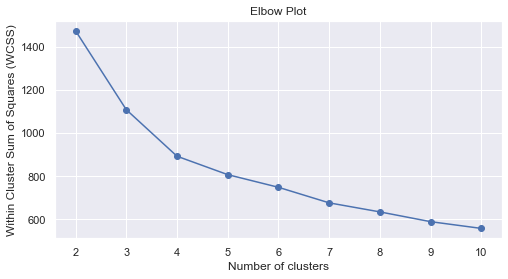

In [39]:
from matplotlib import cm

plt.figure(figsize=(8,4))
plt.plot(kmeans_clusters.num_clusters, kmeans_clusters.wcss, marker = "o" )
plt.title('Elbow Plot') 
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares (WCSS)')


### C. On the above visual, highlight which are the possible Elbow points. [1 Marks]

#### Ans: From the above visual, the possible elbow points are 4 and 5. Since the line takes sharper turn at 4 than at 5, we can create 4 clusters.  

### D. Train a K-means clustering model once again on the optimal number of clusters. [3 Marks]

In [40]:
kmeans_4cluster = KMeans(n_clusters = 4, init = 'k-means++', n_init = 6, random_state = 1)
kmeans_4cluster.fit(car_scaled)

KMeans(n_clusters=4, n_init=6, random_state=1)

In [41]:
cluster_prediction=kmeans_4cluster.predict(car_scaled)

In [42]:
cluster_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 3, 3, 0, 0, 0, 0,
       0, 0, 3, 1, 1, 1, 1, 0, 0, 0, 0, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 0, 1, 1, 1, 1, 3, 0, 0,
       0, 0, 0, 3, 0, 1, 1, 0, 0, 0, 0, 1, 0, 3, 1, 3, 3, 3, 3, 0, 0, 0,
       0, 3, 3, 3, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 0, 0, 3, 0, 0, 0, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 3, 3, 3, 2, 0, 0,
       2, 3, 3, 3, 3, 0, 2, 0, 0, 0, 1, 0, 3, 3, 1, 1, 1, 1, 2, 2, 2, 0,
       2, 1, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 0, 3,
       0, 0, 2, 2, 2, 2, 2, 3, 1, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3,
       1, 1, 2, 2, 2, 2, 0, 3, 2, 0, 0, 3, 0, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       1, 1, 3, 1, 1, 3, 1, 2, 2, 2, 2, 3, 3, 2, 3,

In [43]:
# Getting the centres for each cluster
centroids = kmeans_4cluster.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(car_scaled))
centroid_df

,mpg,cyl,disp,hp,wt,acc,origin_1,origin_2,origin_3,age
0,0.213034,-0.868333,-0.823983,-0.553295,-0.769895,0.286859,0.244898,4.591837e-01,2.959184e-01,0.635472
1,-1.163797,1.498191,1.503923,1.521793,1.404098,-1.086149,1.000000,-2.498002e-16,8.326673e-17,0.688324
2,1.172644,-0.825340,-0.778107,-0.745103,-0.760687,0.410654,0.421053,1.842105e-01,3.947368e-01,-1.101793
3,-0.490890,0.416907,0.305280,-0.042217,0.328074,0.295340,0.902174,4.347826e-02,5.434783e-02,-0.014938


#### Insights:
- Cluster 2 has highest values of mpg and Cluster 1 has lowest value of mpg.
- Cluster 1 has maximum number of cylinders and Cluster 2 has minimum number of  cylinders.
- Cluster 1 has maximum displacement and Cluster 0 has least displacement values.
- Cluster 1 has highest values of hp and Cluster 2 has lowest hp values.
- Cluster 1 has highest values of wt and Cluster 0 has lowest wt values.
- Cluster 2 has highest values of acc and Cluster 1 has lowest acc values.
- Cluster 2 has newest cars as it has lowest age values.

### E. Add a new feature in the DataFrame which will have labels based upon cluster value. [2 Marks]

In [44]:
#Add the prediction to the scaled df i.e car_scaled
car_scaled["cluster_id"] = cluster_prediction
print("Cluster ids are assigned as below : \n")
car_scaled.head()

Cluster ids are assigned as below : 



,mpg,cyl,disp,hp,wt,acc,origin_1,origin_2,origin_3,age,cluster_id
0,-0.706439,1.498191,1.090604,0.673277,0.630870,-1.295498,1,0,0,1.627426,1
1,-1.090751,1.498191,1.503514,1.590065,0.854333,-1.477038,1,0,0,1.627426,1
2,-0.706439,1.498191,1.196232,1.197156,0.550470,-1.658577,1,0,0,1.627426,1
3,-0.962647,1.498191,1.061796,1.197156,0.546923,-1.295498,1,0,0,1.627426,1
4,-0.834543,1.498191,1.042591,0.935216,0.565841,-1.840117,1,0,0,1.627426,1


In [45]:
car_scaled.head(20)

,mpg,cyl,disp,hp,wt,acc,origin_1,origin_2,origin_3,age,cluster_id
0,-0.706439,1.498191,1.090604,0.673277,0.630870,-1.295498,1,0,0,1.627426,1
1,-1.090751,1.498191,1.503514,1.590065,0.854333,-1.477038,1,0,0,1.627426,1
2,-0.706439,1.498191,1.196232,1.197156,0.550470,-1.658577,1,0,0,1.627426,1
3,-0.962647,1.498191,1.061796,1.197156,0.546923,-1.295498,1,0,0,1.627426,1
4,-0.834543,1.498191,1.042591,0.935216,0.565841,-1.840117,1,0,0,1.627426,1
5,-1.090751,1.498191,2.262118,2.454465,1.620492,-2.021656,1,0,0,1.627426,1
6,-1.218855,1.498191,2.502182,3.030732,1.635863,-2.384735,1,0,0,1.627426,1
7,-1.218855,1.498191,2.367746,2.899762,1.586204,-2.566274,1,0,0,1.627426,1
8,-1.218855,1.498191,2.511784,3.161702,1.719809,-2.021656,1,0,0,1.627426,1
9,-1.090751,1.498191,1.887617,2.244913,1.039961,-2.566274,1,0,0,1.627426,1


In [46]:
#Showing the list of cluster ids and number of records assigned for each cluster
car_scaled["cluster_id"].value_counts()

2    114
0     98
1     94
3     92
Name: cluster_id, dtype: int64

In [47]:
labels = kmeans_4cluster.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[ 98  94 114  92]


In [48]:
#Since we cannot interpret much from scaled df, we can add the prediction to df with actual values so that it is easy to interpret the results.
car_grouped=car_df.copy()
car_grouped["cluster_id"] = cluster_prediction
print("Cluster ids are assigned as below : \n")
car_grouped.head(20)

Cluster ids are assigned as below : 



,mpg,cyl,disp,hp,wt,acc,origin_1,origin_2,origin_3,age,cluster_id
0,18.0,8,307.0,130,3504,12.0,1,0,0,13,1
1,15.0,8,350.0,165,3693,11.5,1,0,0,13,1
2,18.0,8,318.0,150,3436,11.0,1,0,0,13,1
3,16.0,8,304.0,150,3433,12.0,1,0,0,13,1
4,17.0,8,302.0,140,3449,10.5,1,0,0,13,1
5,15.0,8,429.0,198,4341,10.0,1,0,0,13,1
6,14.0,8,454.0,220,4354,9.0,1,0,0,13,1
7,14.0,8,440.0,215,4312,8.5,1,0,0,13,1
8,14.0,8,455.0,225,4425,10.0,1,0,0,13,1
9,15.0,8,390.0,190,3850,8.5,1,0,0,13,1


In [49]:
car_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         398 non-null    float64
 1   cyl         398 non-null    int64  
 2   disp        398 non-null    float64
 3   hp          398 non-null    int64  
 4   wt          398 non-null    int64  
 5   acc         398 non-null    float64
 6   origin_1    398 non-null    uint8  
 7   origin_2    398 non-null    uint8  
 8   origin_3    398 non-null    uint8  
 9   age         398 non-null    int64  
 10  cluster_id  398 non-null    int32  
dtypes: float64(3), int32(1), int64(4), uint8(3)
memory usage: 24.6 KB


In [50]:
car_grouped["cluster_id"].value_counts()

2    114
0     98
1     94
3     92
Name: cluster_id, dtype: int64

### F. Plot a visual and color the datapoints based upon clusters. [2 Marks]

In [51]:
# Let us visualize the data points and the clusters formed.
X1=car_scaled.to_numpy()
X1.shape

(398, 11)

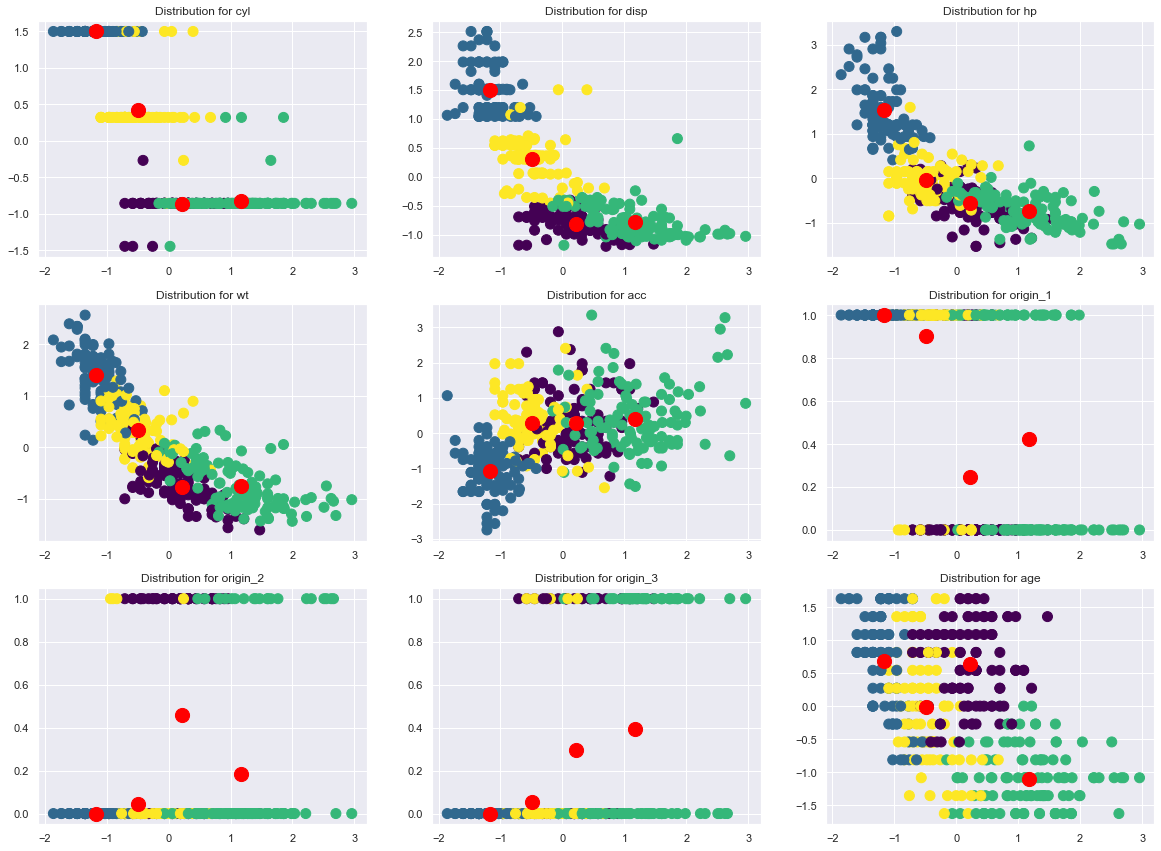

In [52]:
plt.figure(figsize=(20,20))
col_list=car_scaled.columns
index = 1
for i in range(1,10):
    plt.subplot(4,3,index)
    plt.scatter(X1[:, 0], X1[:, i], c=cluster_prediction, s=100, cmap='viridis')
    # Plot the clusters 
    plt.scatter(kmeans_4cluster.cluster_centers_[:, 0], 
                kmeans_4cluster.cluster_centers_[:, i], 
                s=200,                             # Set centroid size
                c='red')
    plt.title('Distribution for {}'.format(col_list[i]))

    index+= 1

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[cluster_id]'>,
        <AxesSubplot:title={'center':'age'}, xlabel='[cluster_id]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[cluster_id]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[cluster_id]'>],
       [<AxesSubplot:title={'center':'hp'}, xlabel='[cluster_id]'>,
        <AxesSubplot:title={'center':'mpg'}, xlabel='[cluster_id]'>,
        <AxesSubplot:title={'center':'origin_1'}, xlabel='[cluster_id]'>,
        <AxesSubplot:title={'center':'origin_2'}, xlabel='[cluster_id]'>],
       [<AxesSubplot:title={'center':'origin_3'}, xlabel='[cluster_id]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[cluster_id]'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

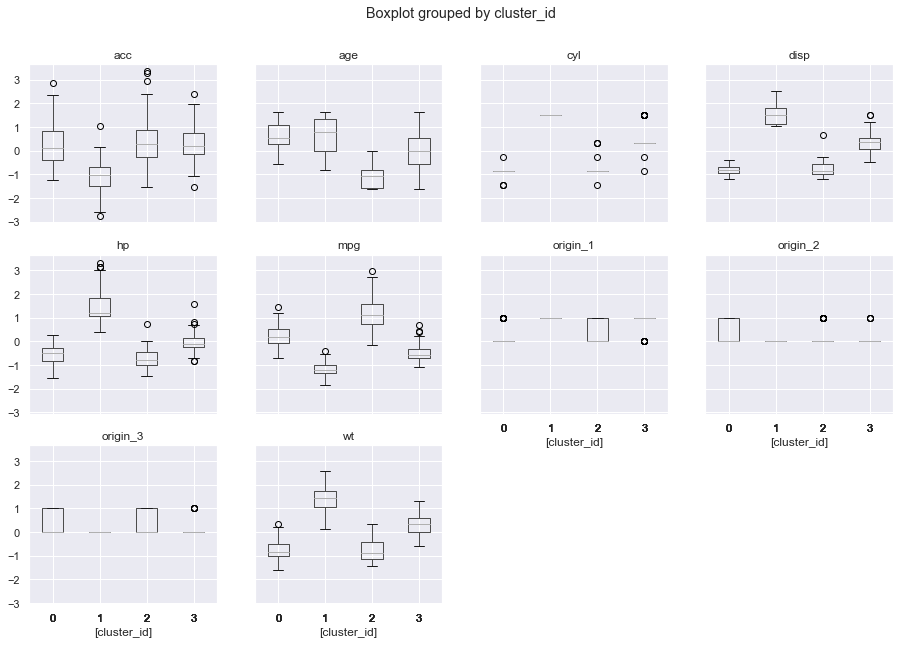

In [53]:
car_scaled.boxplot(by = 'cluster_id',  layout=(3,4), figsize=(15, 10))

### G. Pass a new DataPoint and predict which cluster it belongs to. [2 Marks]

In [54]:
#sample_existing_data=[{"mpg":18, "cyl":8,"disp":307.0,"hp":130,"wt":3504,"acc":12.0,"origin_1":1,"origin_2":0,"origin_3":0,"age":13}]
#sample_existing_scaled_data=[{"mpg":-0.706439, "cyl":1.498191,"disp":1.090604,"hp":0.673277,"wt":0.63087,"acc":-1.295498,"origin_1":1,"origin_2":0,"origin_3":0,"age":1.627426}]
#As per model training, cluster 1 is assigned for the above. 
#First let us see if model predicts the same cluster when predicted again.

sample_existing_scaled_data=[{"mpg":-0.706439, "cyl":1.498191,"disp":1.090604,"hp":0.673277,"wt":0.63087,"acc":-1.295498,"origin_1":1,"origin_2":0,"origin_3":0,"age":1.627426}]

sample_existing_scaled_df=pd.DataFrame(sample_existing_scaled_data)
sample_existing_scaled_df=sample_existing_scaled_df.astype({"mpg":'float64', "cyl":'float64',"disp":'float64',"hp":'float64',"wt":'float64',"acc":'float64',"origin_1":'uint8',"origin_2":'uint8',"origin_3":'uint8',"age":'float64'})
sample_existing_scaled_df.head()

,mpg,cyl,disp,hp,wt,acc,origin_1,origin_2,origin_3,age
0,-0.706439,1.498191,1.090604,0.673277,0.63087,-1.295498,1,0,0,1.627426


In [55]:
#Predicting the cluster for this existing data. Expectation is to get cluster 1 correctly.
cluster_predict=kmeans_4cluster.predict(sample_existing_scaled_df)
print("Model has predicted the cluster id as :{}".format(cluster_predict[0]))

Model has predicted the cluster id as :1


#### Insight: Yes the model predicted correctly cluster 1 as in training dataset.

In [56]:
#Now lets adjust some of the values and see what clusters are predicted.
#The first entry is very much close to sample_existing_scaled_data, so expecting it to predict under cluster 1.
test_data=[{"mpg":-0.696439, "cyl":1.508191,"disp":1.100604,"hp":0.703277,"wt":0.65087,"acc":-1.495498,"origin_1":1,"origin_2":0,"origin_3":0,"age":1.627426},
          {"mpg":-0.322127, "cyl":0.320935,"disp":0.063128,"hp":-0.505451,"wt":-0.453340,"acc":0.156817,"origin_1":1,"origin_2":0,"origin_3":0,"age":1.627426},
          {"mpg":0.446497, "cyl":-0.856321,"disp":-0.925936,"hp":-0.426869,"wt":-0.993671,"acc":-0.387801,"origin_1":0,"origin_2":0,"origin_3":1,"age":1.627426}
          ]
test_df=pd.DataFrame(test_data)
test_df=test_df.astype({"mpg":'float64', "cyl":'float64',"disp":'float64',"hp":'float64',"wt":'float64',"acc":'float64',"origin_1":'uint8',"origin_2":'uint8',"origin_3":'uint8',"age":'float64'})
test_df.head()


,mpg,cyl,disp,hp,wt,acc,origin_1,origin_2,origin_3,age
0,-0.696439,1.508191,1.100604,0.703277,0.650870,-1.495498,1,0,0,1.627426
1,-0.322127,0.320935,0.063128,-0.505451,-0.453340,0.156817,1,0,0,1.627426
2,0.446497,-0.856321,-0.925936,-0.426869,-0.993671,-0.387801,0,0,1,1.627426


In [57]:
#Predicting the cluster for this existing data. Expectation is to get cluster 1 correctly.
cluster_predict=kmeans_4cluster.predict(test_df)
print("Model has predicted the cluster id as :{}".format(cluster_predict))

Model has predicted the cluster id as :[1 3 0]


#### Insights:
- Cluster 1 is predicted for test_data record1: {"mpg":-0.696439, "cyl":1.508191,"disp":1.100604,"hp":0.703277,"wt":0.65087,"acc":-1.495498,"origin_1":1,"origin_2":0,"origin_3":0,"age":1.627426},
- Cluster 3 is predicted for test_data record2: {"mpg":-0.322127, "cyl":0.320935,"disp":0.063128,"hp":-0.505451,"wt":-0.453340,"acc":0.156817,"origin_1":1,"origin_2":0,"origin_3":0,"age":1.627426},
- Cluster 0 is predicted for test_data record3: {"mpg":0.446497, "cyl":-0.856321,"disp":-0.925936,"hp":-0.426869,"wt":-0.993671,"acc":-0.387801,"origin_1":0,"origin_2":0,"origin_3":1,"age":1.627426}

# PART B
## 1. Data Understanding & Cleaning: [5 Marks]
### A. Read ‘vehicle.csv’ and save as DataFrame. [1 Marks]

In [58]:
vehicle=pd.read_csv("vehicle.csv")
vehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [59]:
vehicle.shape

(846, 19)

In [60]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [61]:
vehicle.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


### B. Check percentage of missing values and impute with correct approach. [1 Marks]

In [62]:
# Quick check on null values
for cols in vehicle.columns:
    print("Number of null values for {0} column is {1}".format(cols,vehicle[cols].isnull().sum()))

Number of null values for compactness column is 0
Number of null values for circularity column is 5
Number of null values for distance_circularity column is 4
Number of null values for radius_ratio column is 6
Number of null values for pr.axis_aspect_ratio column is 2
Number of null values for max.length_aspect_ratio column is 0
Number of null values for scatter_ratio column is 1
Number of null values for elongatedness column is 1
Number of null values for pr.axis_rectangularity column is 3
Number of null values for max.length_rectangularity column is 0
Number of null values for scaled_variance column is 3
Number of null values for scaled_variance.1 column is 2
Number of null values for scaled_radius_of_gyration column is 2
Number of null values for scaled_radius_of_gyration.1 column is 4
Number of null values for skewness_about column is 6
Number of null values for skewness_about.1 column is 1
Number of null values for skewness_about.2 column is 1
Number of null values for hollows_rat

In [63]:
# feature-wise percentage of missing values present in the data
def find_missing(df):
    null_percentage=[{col : df[col].isnull().sum()*100/len(df)} for col in df.columns]
    for x in null_percentage:
        for k,v in x.items():
            print("Column name: {0} ; missing percentage : {1}".format(k,v))

In [64]:
find_missing(vehicle)

Column name: compactness ; missing percentage : 0.0
Column name: circularity ; missing percentage : 0.5910165484633569
Column name: distance_circularity ; missing percentage : 0.4728132387706856
Column name: radius_ratio ; missing percentage : 0.7092198581560284
Column name: pr.axis_aspect_ratio ; missing percentage : 0.2364066193853428
Column name: max.length_aspect_ratio ; missing percentage : 0.0
Column name: scatter_ratio ; missing percentage : 0.1182033096926714
Column name: elongatedness ; missing percentage : 0.1182033096926714
Column name: pr.axis_rectangularity ; missing percentage : 0.3546099290780142
Column name: max.length_rectangularity ; missing percentage : 0.0
Column name: scaled_variance ; missing percentage : 0.3546099290780142
Column name: scaled_variance.1 ; missing percentage : 0.2364066193853428
Column name: scaled_radius_of_gyration ; missing percentage : 0.2364066193853428
Column name: scaled_radius_of_gyration.1 ; missing percentage : 0.4728132387706856
Column 

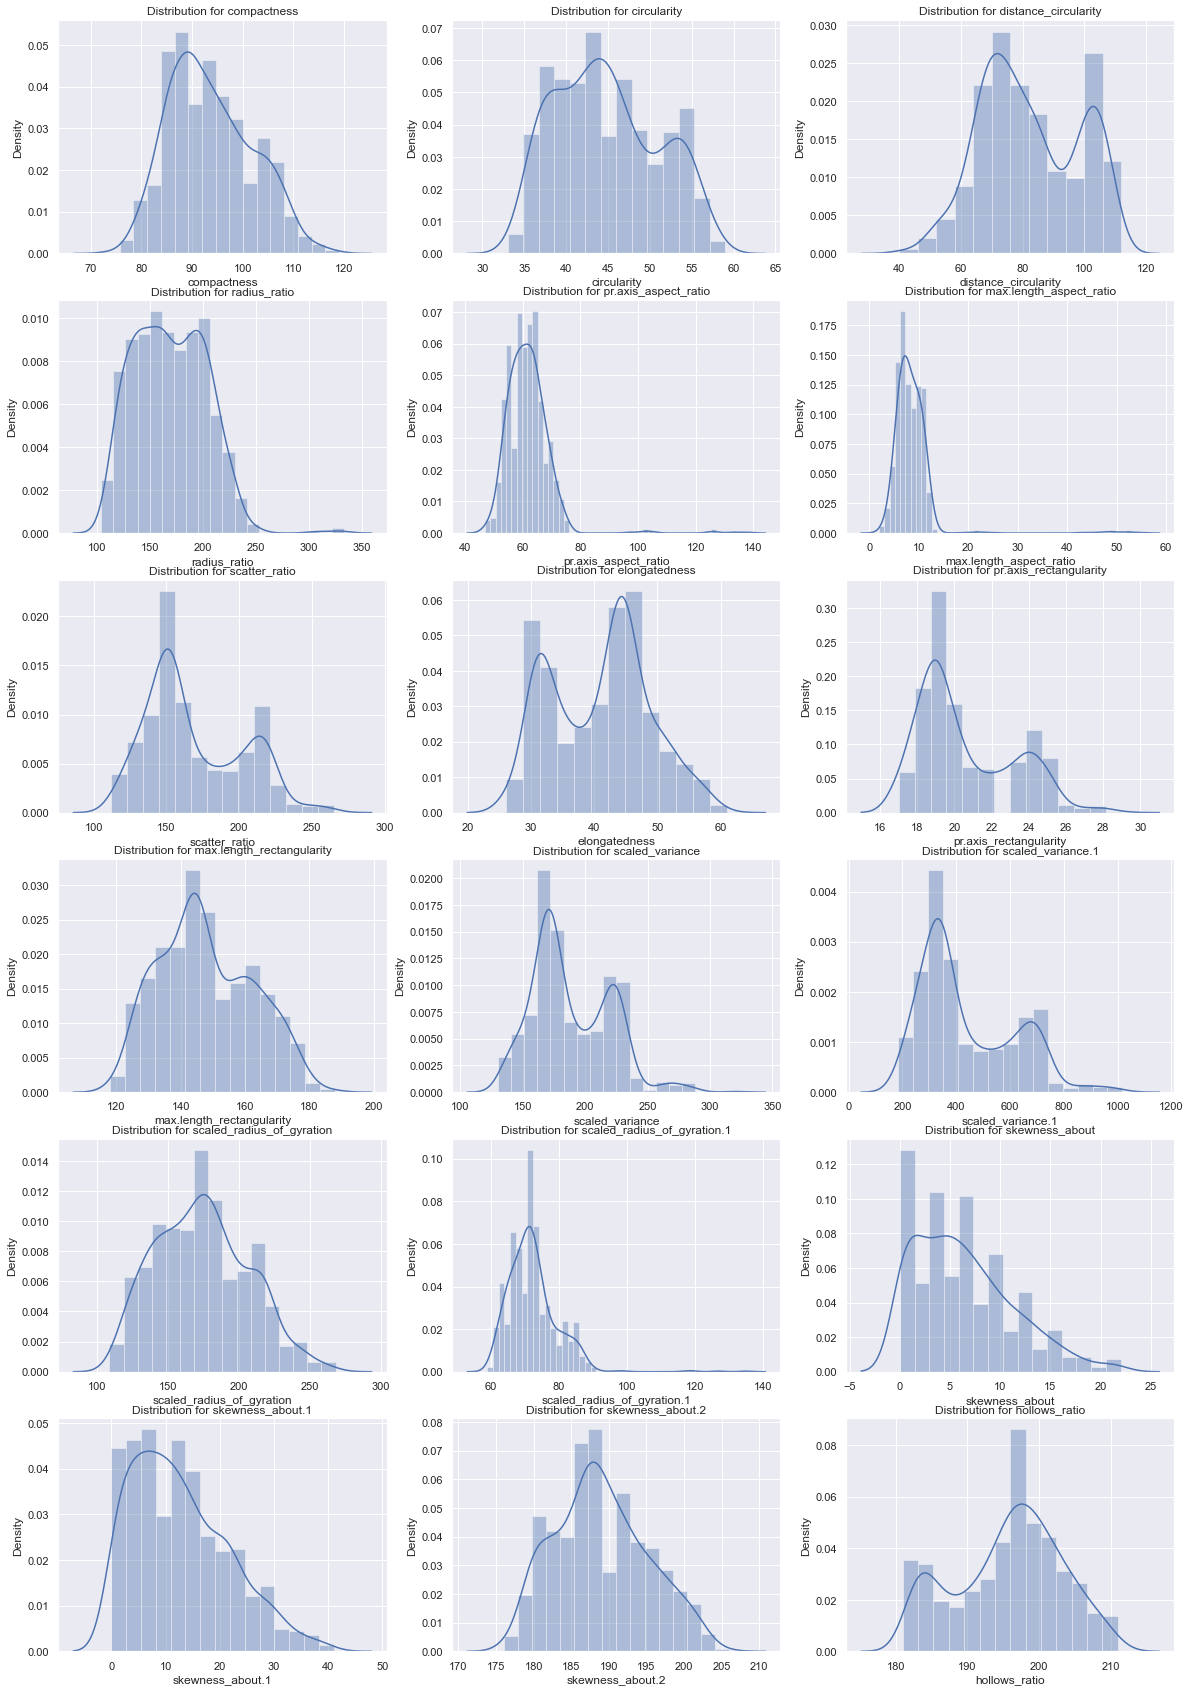

In [65]:
# To decide on impute approach, let us see the data distribution for each of the fields
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,30))
col_list=vehicle.columns
vehicle_tmp=vehicle.copy()
vehicle_tmp=vehicle_tmp.dropna()

x = 1
for col in col_list[0:-1]:
    plt.subplot(6,3,x)
    sns.distplot(vehicle_tmp[col])
    plt.title('Distribution for {}'.format(col))
    x += 1

#### Insights: When seeing the data distribution, the data is not normally distributed. We can either impute with median or drop the records which have null values. Since number of null values are less we can drop the records with null values.

In [66]:
vehicle=vehicle.dropna()
vehicle.shape

(813, 19)

In [67]:
vehicle.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### C. Visualize a Pie-chart and print percentage of values for variable ‘class’. [2 Marks]

In [68]:
class_counts=vehicle['class'].value_counts()
class_df = pd.DataFrame(class_counts)
class_df = class_df.reset_index()
class_df.columns = ['class_vals', 'class_count']
class_df.head()

,class_vals,class_count
0,car,413
1,bus,205
2,van,195


In [69]:
class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class_vals   3 non-null      object
 1   class_count  3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


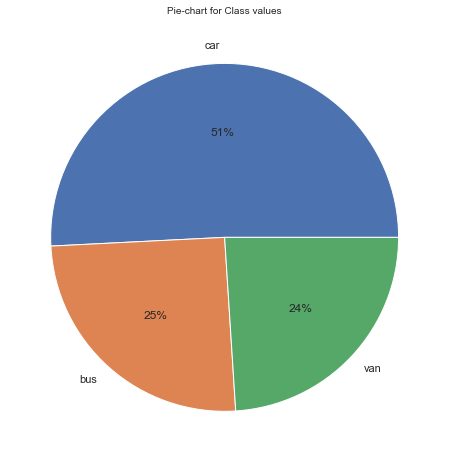

In [70]:
#Among top 10 oldest teams, pie-chart depicting the distribution of teams launched per year
plt.figure(figsize=(8,8))
plt.pie(data=class_df, labels='class_vals',x='class_count',autopct='%.0f%%')
plt.title("Pie-chart for Class values", size=10)
plt.show()

### D. Check for duplicate rows in the data and impute with correct approach. [1 Marks]

In [71]:
#checking for duplicates 
dup_count=vehicle.duplicated().sum()
print("Number of duplicates in the vehicle dataframe: {}".format(dup_count))

Number of duplicates in the vehicle dataframe: 0


##### The column 'class' has categorical values. Applying label encoder for 'class'.

In [72]:
labelencoder = LabelEncoder()
vehicle['class'] = labelencoder.fit_transform(vehicle['class'])
vehicle['class'].value_counts()

1    413
0    205
2    195
Name: class, dtype: int64

#### After applying label encoder
- 0 refers bus and has 205 entries
- 1 refers car and has 413 entries
- 2 refers van and has 195 entries

In [73]:
vehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0


## 2. Data Preparation: [2 Marks]
### A. Split data into X and Y. [Train and Test optional] [1 Marks]

In [74]:
X=vehicle.drop(columns=['class'],axis=1)
y=vehicle[['class']]
X.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,93.656827,44.803198,82.04305,169.098401,61.774908,8.599016,168.563346,40.98893,20.558426,147.891759,188.377614,438.382534,174.252153,72.399754,6.351784,12.687577,188.979090,195.729397
std,8.233751,6.146659,15.78307,33.615402,7.973000,4.677174,33.082186,7.80338,2.573184,14.504648,31.165873,175.270368,32.332161,7.475994,4.921476,8.926951,6.153681,7.398781
min,73.000000,33.000000,40.00000,104.000000,47.000000,2.000000,112.000000,26.00000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.00000,141.000000,57.000000,7.000000,146.000000,33.00000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,93.000000,44.000000,79.00000,167.000000,61.000000,8.000000,157.000000,43.00000,20.000000,146.000000,179.000000,364.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,100.000000,49.000000,98.00000,195.000000,65.000000,10.000000,198.000000,46.00000,23.000000,159.000000,217.000000,586.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.00000,333.000000,138.000000,55.000000,265.000000,61.00000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [75]:
y.describe()

,class
count,813.000000
mean,0.987700
std,0.701754
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,2.000000


### B. Standardize the Data. [1 Marks]

In [76]:
# since feature list are of different measurements we need to prepare scaled data, We can either use zscore or standardscaler
#X_scaled=X.apply(zscore)
#X_scaled.describe()
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.20,random_state=1)
X_train

array([[-0.07982157,  0.19482757, -0.00272931, ..., -0.97378433,
        -0.97222629, -0.23388474],
       [-1.29508254, -0.13075273, -0.89030178, ..., -1.3100522 ,
        -0.6470175 , -0.63960655],
       [ 1.5000177 ,  1.98551925,  1.58222152, ...,  2.05262652,
        -1.46003948, -1.58629079],
       ...,
       [-0.80897815,  0.19482757, -0.70010768, ..., -1.42214149,
        -0.4844131 , -0.77484716],
       [-0.07982157,  0.35761773,  0.18746479, ..., -0.41333788,
        -0.80962189,  0.03659647],
       [-0.68745206, -1.2702838 , -1.96806834, ...,  0.37128716,
        -1.62264388, -1.7215314 ]])

In [78]:
y_train

,class
45,2
218,0
687,0
830,0
636,1
...,...
748,2
800,2
80,0
254,2


In [79]:
X_test

array([[ 1.5000177 ,  1.49714879,  1.13843529, ..., -0.1891593 ,
        -1.13483069, -1.856772  ],
       [ 1.5000177 ,  1.33435864,  1.01163922, ...,  0.48337645,
        -0.6470175 , -1.58629079],
       [ 1.3784916 ,  1.33435864,  1.64561955, ...,  2.50098368,
         0.00340009,  0.98328071],
       ...,
       [ 0.16323063,  1.33435864,  0.82144512, ..., -1.19796291,
        -0.1592043 ,  0.03659647],
       [-1.17355645, -0.13075273, -0.12952538, ...,  0.48337645,
        -0.97222629, -0.36912534],
       [ 1.2569655 ,  1.17156849,  1.77241562, ...,  1.71635865,
        -0.1592043 ,  0.30707769]])

In [80]:
y_test

,class
381,0
777,0
570,1
837,1
10,2
...,...
39,0
720,1
756,1
252,2


## 3. Model Building: [13 Marks]
### A. Train a base Classification model using SVM. [1 Marks]

In [81]:
#Training the model using SVM
from sklearn import svm
clf = svm.SVC(gamma=0.025, C=3)  

In [82]:
clf.fit(X_train, y_train.values.ravel())

SVC(C=3, gamma=0.025)

In [83]:
predicted_labels_train = clf.predict(X_train)

In [84]:
predicted_labels_test = clf.predict(X_test)

In [85]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x]==predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [86]:
train_accuracy=getAccuracy(y_train["class"].tolist(),predicted_labels_train)
print("Train score accuracy using SVM: {}".format(train_accuracy))

Train score accuracy using SVM: 98.0


In [87]:
test_accuracy=getAccuracy(y_test["class"].tolist(),predicted_labels_test)
print("Test score accuracy using SVM: {}".format(test_accuracy))

Test score accuracy using SVM: 97.54601226993866


In [88]:
#sample actual Vs Predicted
y_grid = (np.column_stack([y_test, predicted_labels_test]))
print(y_grid)

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 2]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]

### B. Print Classification metrics for train data. [1 Marks]

Confusion Matrix


<AxesSubplot:>

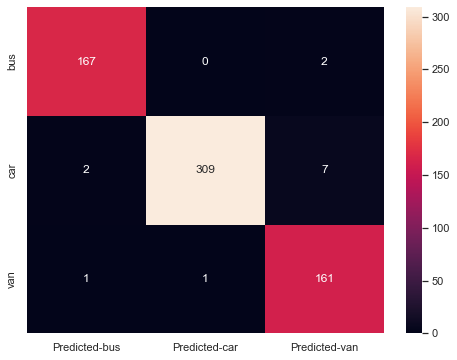

In [89]:
print("Confusion Matrix")
cm_train=metrics.confusion_matrix(y_train, predicted_labels_train, labels=[0,1,2])

df_cm_train = pd.DataFrame(cm_train, index = [i for i in ["bus","car","van"]],
                  columns = [i for i in ["Predicted-bus","Predicted-car","Predicted-van"]])
plt.figure(figsize = (8,6))
sns.heatmap(df_cm_train, annot=True,fmt='g')

#### Insights on the confusion matrix

- Model correctly predicted 167 vehicle type as bus, 309 vehicle type as car and 161 vehicle type as van.
- Model incorrectly predicted 2 vehicle types as bus but those are car and 1 vehicle type as bus but it is van. 
- Model incorrectly predicted 1 vehicle type as car but it is van.
- Model incorrectly predicted 2 vehicle type as van but those are bus and 7 vehicle type as van but those are car.


In [90]:
print("classification  Metrics for train dataset:\n",classification_report(y_train,predicted_labels_train))

classification  Metrics for train dataset:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       169
           1       1.00      0.97      0.98       318
           2       0.95      0.99      0.97       163

    accuracy                           0.98       650
   macro avg       0.98      0.98      0.98       650
weighted avg       0.98      0.98      0.98       650



#### Insights on training data prediction:
Precision: Out of all predicted values, what fraction are predicted correctly
Recall(sensitivity or TPR): Out of all actual values how much fraction we identified correctly

Model predicted correctly that the vehicle type as bus for 98% of the time.
<br>Model predicted correctly that the vehicle type as car for 100% of the time.
<br>Model predicted correctly that the vehicle type as van for 95% of the time.

By F1 score we can say that precison and recall is balanced for vehicle type bus by 99%, for car by 98% and for van by 97%
Precision is higher for vehicle type car by 100% and f1-score is higher for vehicle type bus by 99% 

In [91]:
predicted_labels_test = clf.predict(X_test)
print("classification  Metrics for test dataset:\n",classification_report(y_test,predicted_labels_test))

classification  Metrics for test dataset:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        36
           1       0.99      0.99      0.99        95
           2       0.91      0.97      0.94        32

    accuracy                           0.98       163
   macro avg       0.97      0.97      0.97       163
weighted avg       0.98      0.98      0.98       163



#### Insights on test data prediction: 
Precision: Out of all predicted values, what fraction are predicted correctly
Recall(sensitivity or TPR): Out of all actual values how much fraction we identified correctly

Model predicted correctly that the vehicle type as bus for 100% of the time.
<br>Model predicted correctly that the vehicle type as car for 99% of the time.
<br>Model predicted correctly that the vehicle type as van for 91% of the time.

By F1 score we can say that precison and recall is balanced for vehicle type bus by 97%, for car by 99% and for van by 94%
Precision is higher for vehicle type bus by 100% and f1-score is higher for vehicle type car by 99% 

### C. Apply PCA on the data with 10 components. [3 Marks]

In [92]:
# Step 1 - Create covariance matrix

cov_matrix = np.cov(X_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00123153  0.69073497  0.79092746  0.68897729  0.09066804  0.1505537
   0.81502868 -0.78902127  0.81522961  0.67573322  0.76532752  0.82125027
   0.58212123 -0.25875528  0.23193313  0.16859183  0.29656022  0.3732647 ]
 [ 0.69073497  1.00123153  0.79868656  0.62471862  0.15521415  0.25192897
   0.85920548 -0.8261242   0.85719089  0.96655501  0.80710097  0.85197956
   0.93674669  0.0491303   0.1419004  -0.00197723 -0.1140426   0.04939203]
 [ 0.79092746  0.79868656  1.00123153  0.77235395  0.16358689  0.26591783
   0.91014241 -0.9138366   0.89836576  0.77441118  0.86674929  0.89288735
   0.70655787 -0.23843852  0.11041593  0.278193    0.14543699  0.34365085]
 [ 0.68897729  0.62471862  0.77235395  1.00123153  0.66819724  0.45301698
   0.74438595 -0.79674104  0.71709175  0.57118076  0.80778118  0.73267385
   0.54530637 -0.17556405  0.04474816  0.17829807  0.37605357  0.47147529]
 [ 0.09066804  0.15521415  0.16358689  0.66819724  1.00123153  0.6528959
   0.11383635 

In [93]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 2.74447428e-01  1.27105989e-01 -1.15778231e-01 -8.00766389e-02
   7.01971756e-02  1.41269187e-01  4.78882430e-01 -5.51289488e-01
   4.70291162e-01  2.71011706e-01 -3.88480982e-02  3.37118452e-02
   1.68590056e-01 -4.08522941e-02  3.33699383e-02  4.49941671e-02
  -8.72862091e-03  4.27500161e-04]
 [ 2.94003600e-01 -1.34430321e-01 -3.64513515e-02 -1.90342131e-01
  -8.66726774e-02 -2.78132128e-01 -2.32112671e-01 -1.77146565e-01
   8.14934003e-03 -8.72464933e-02  1.10855608e-02 -1.12606467e-01
  -6.30087058e-02  1.60416148e-01 -4.20446984e-01  6.57048309e-01
  -1.69794331e-01  1.73650656e-02]
 [ 3.04380218e-01  7.21448351e-02 -5.51881577e-02  6.93709791e-02
   3.89590342e-02 -1.36322721e-01  6.01737282e-02  4.36495932e-01
   1.76997855e-01  2.14799970e-01 -7.02546566e-01 -2.85482662e-02
  -2.16299609e-01 -2.13651022e-01 -1.19627607e-01 -2.21685599e-02
   2.86460253e-02 -1.13772044e-02]
 [ 2.68888600e-01  1.76416250e-01  2.81804540e-01  4.46505645e-02
  -4.36633252e-02  

In [94]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 52.45421787  69.04278236  79.68349586  86.17614977  91.33143713
  94.2843067   96.27670728  97.51052572  98.3766432   98.89167071
  99.24417716  99.49049637  99.68338315  99.80107333  99.89049256
  99.96322521  99.99796993 100.        ]


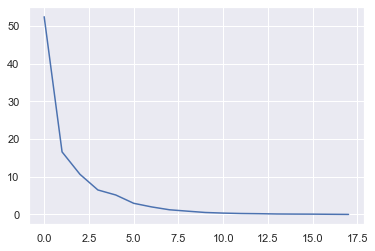

In [95]:
plt.plot(var_exp)

#### Insights:
- Visually we can observe that their is steep drop in variance explained with increase in number of PC's.
- We will proceed with 10 components here. 

In [96]:
# PCA can be done using scikit learn PCA. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X_scaled)
X_reduced.transpose()

array([[ 0.35224921, -1.5780723 ,  3.78255625, ...,  4.83112974,
        -3.26941568, -4.75521696],
       [-0.14102681, -0.4221973 ,  0.25325744, ...,  0.07323619,
        -1.01866536,  0.30767001],
       [ 0.96183193, -0.36526142,  0.06175618, ...,  0.48997353,
        -0.34344083, -0.58216391],
       ...,
       [-0.38832347,  0.25832407,  0.4788957 , ...,  0.12766991,
         0.31487696, -0.23686544],
       [-0.9081888 ,  0.13788287, -0.27596753, ..., -0.61546869,
        -0.22022929, -0.45108813],
       [ 0.08723554, -0.09329092, -0.47740075, ...,  0.54772524,
        -0.88751729, -0.31389843]])

In [97]:
pca.components_

array([[ 2.74447428e-01,  2.94003600e-01,  3.04380218e-01,
         2.68888600e-01,  8.30199914e-02,  9.84825471e-02,
         3.16688948e-01, -3.13205048e-01,  3.13612229e-01,
         2.81285672e-01,  3.09161565e-01,  3.14163506e-01,
         2.70337322e-01, -2.56036923e-02,  3.96799548e-02,
         6.31600075e-02,  3.09410342e-02,  7.93661290e-02],
       [-1.27105989e-01,  1.34430321e-01, -7.21448351e-02,
        -1.76416250e-01, -9.87633531e-02,  3.02068515e-02,
         4.43899402e-02,  1.52539710e-02,  5.72306050e-02,
         1.20324381e-01,  6.19096771e-02,  4.80210991e-02,
         2.10169704e-01,  4.93793797e-01, -5.62601909e-02,
        -1.21035426e-01, -5.44491703e-01, -5.38881650e-01],
       [-1.15778231e-01, -3.64513515e-02, -5.51881577e-02,
         2.81804540e-01,  6.45768877e-01,  5.86412351e-01,
        -9.85848213e-02,  5.66515157e-02, -1.12039253e-01,
        -2.41324720e-02,  5.97234736e-02, -1.09452782e-01,
        -3.70630986e-02,  2.75779539e-01, -1.10191782e

### D. Visualize Cumulative Variance Explained with Number of Components. [2 Marks]

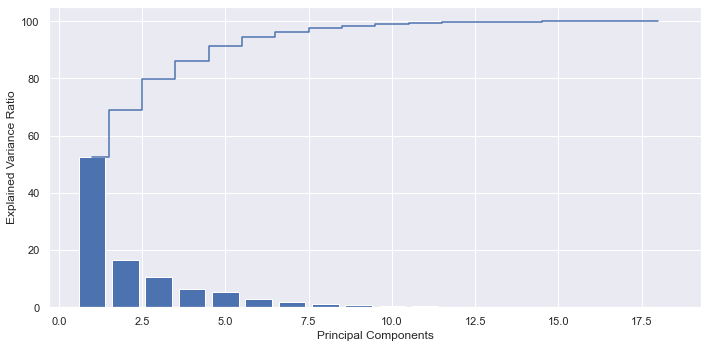

In [98]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 1, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.tight_layout()
plt.show()

### E. Draw a horizontal line on the above plot to highlight the threshold of 90%. [1 Marks]

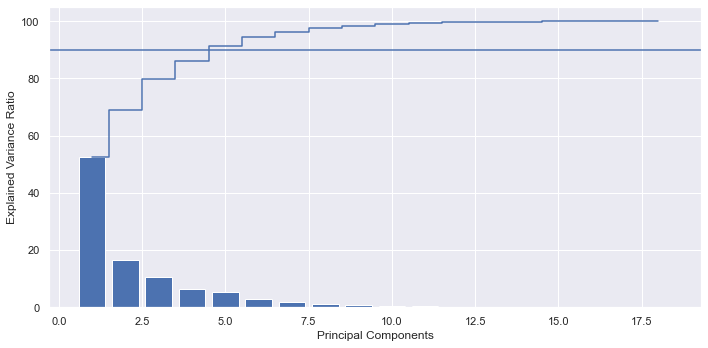

In [99]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 1, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.axhline(90)
plt.tight_layout()
plt.show()


### F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained. [2 Marks]

In [100]:
# PCA can be done using scikit learn PCA. It does all the above steps and maps data to PCA dimensions in one shot
# Minimum number of components with 90% variation explained will be 5 components
from sklearn.decomposition import PCA

pca5 = PCA(n_components=5)
X_reduced = pca5.fit_transform(X_scaled)
X_reduced.transpose()

array([[ 0.35224921, -1.5780723 ,  3.78255625, ...,  4.83112974,
        -3.26941568, -4.75521696],
       [-0.14102681, -0.4221973 ,  0.25325744, ...,  0.07323619,
        -1.01866536,  0.30767001],
       [ 0.96183193, -0.36526142,  0.06175618, ...,  0.48997353,
        -0.34344083, -0.58216391],
       [ 0.19087161,  0.23933356,  1.21641553, ...,  0.31789645,
        -1.92725627, -1.22627729],
       [ 0.06961593,  0.68589854,  0.71733688, ..., -1.35923931,
         0.04764038, -0.05228634]])

In [101]:
pca5.components_

array([[ 0.27444743,  0.2940036 ,  0.30438022,  0.2688886 ,  0.08301999,
         0.09848255,  0.31668895, -0.31320505,  0.31361223,  0.28128567,
         0.30916156,  0.31416351,  0.27033732, -0.02560369,  0.03967995,
         0.06316001,  0.03094103,  0.07936613],
       [-0.12710599,  0.13443032, -0.07214484, -0.17641625, -0.09876335,
         0.03020685,  0.04438994,  0.01525397,  0.0572306 ,  0.12032438,
         0.06190968,  0.0480211 ,  0.2101697 ,  0.4937938 , -0.05626019,
        -0.12103543, -0.5444917 , -0.53888165],
       [-0.11577823, -0.03645135, -0.05518816,  0.28180454,  0.64576888,
         0.58641235, -0.09858482,  0.05665152, -0.11203925, -0.02413247,
         0.05972347, -0.10945278, -0.0370631 ,  0.27577954, -0.11019178,
        -0.08049935,  0.031728  ,  0.05694625],
       [ 0.08007664,  0.19034213, -0.06937098, -0.04465056,  0.03005322,
         0.0297503 , -0.09441724,  0.08506744, -0.09189742,  0.19229389,
        -0.11947568, -0.09131759,  0.20488676, -0.071

### G. Train SVM model on components selected from above step. [1 Marks]

In [102]:
X_train,X_test,y_train,y_test=train_test_split(X_reduced,y,test_size=0.20,random_state=1)
X_train

array([[-0.39424512,  1.49244137,  0.1533672 ,  0.40875788, -0.95459232],
       [-2.07893045,  1.24468894,  0.28132503,  0.31669873, -1.50163167],
       [ 7.4508592 ,  3.15815063, -0.54844685, -1.59270043,  1.32962053],
       ...,
       [-1.36927673,  1.08138751,  0.39381428,  0.65295755, -1.61728315],
       [-0.35203327,  0.83733865,  0.98426266,  0.05740104, -0.63907617],
       [-5.34320734,  2.36996524, -0.71024003, -0.36966031,  1.27920559]])

In [103]:
#Training the model using SVM
from sklearn import svm
clf = svm.SVC(gamma=0.025, C=3)  

In [104]:
clf.fit(X_train, y_train.values.ravel())

SVC(C=3, gamma=0.025)

In [105]:
predicted_labels_train = clf.predict(X_train)

In [106]:
predicted_labels_test = clf.predict(X_test)

In [107]:
train_accuracy=getAccuracy(y_train["class"].tolist(),predicted_labels_train)
print("Train score accuracy using SVM: {}".format(train_accuracy))

Train score accuracy using SVM: 78.0


In [108]:
test_accuracy=getAccuracy(y_test["class"].tolist(),predicted_labels_test)
print("Test score accuracy using SVM: {}".format(test_accuracy))

Test score accuracy using SVM: 76.07361963190185


In [109]:
#sample actual Vs Predicted
y_grid = (np.column_stack([y_test, predicted_labels_test]))
print(y_grid)

[[0 0]
 [0 0]
 [1 1]
 [1 2]
 [2 2]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 2]
 [2 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [2 2]
 [2 0]
 [2 2]
 [1 0]
 [0 0]
 [2 1]
 [0 1]
 [1 1]
 [0 0]
 [2 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 2]
 [1 1]
 [2 2]
 [2 0]
 [2 2]
 [0 0]
 [1 2]
 [1 1]
 [0 0]
 [1 2]
 [0 0]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 2]
 [1 2]
 [2 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [2 2]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [1 2]
 [1 1]
 [0 0]
 [1 1]
 [0 2]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 2]
 [1 1]
 [0 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]

### H. Print Classification metrics for train data of above model and share insights. [2 Marks]

In [110]:
def plot_confusion_matrix(y,y_pred):
    print("Confusion Matrix:")
    cm=metrics.confusion_matrix(y, y_pred, labels=[0,1,2])

    cm_df = pd.DataFrame(cm, index = [i for i in ["bus","car","van"]],
                      columns = [i for i in ["Predicted-bus","Predicted-car","Predicted-van"]])
    plt.figure(figsize = (8,6))
    sns.heatmap(cm_df, annot=True,fmt='g')

Confusion Matrix:


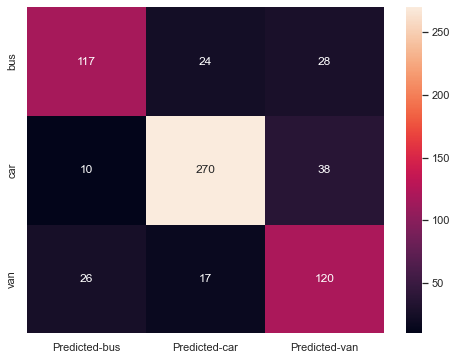

In [111]:
plot_confusion_matrix(y_train, predicted_labels_train)

#### Insights on the confusion matrix:

- Model correctly predicted 117 vehicle type as bus, 270 vehicle type as car and 120 vehicle type as van.
- Model incorrectly predicted 10 vehicle types as bus but those are car and 26 vehicle type as bus but those are van. 
- Model incorrectly predicted 24 vehicle type as car but those are bus and 17 vehicle type as car but those are van.
- Model incorrectly predicted 28 vehicle type as van but those are bus and 38 vehicle type as van but those are car.

In [112]:
print("classification  Metrics for train dataset:\n",classification_report(y_train,predicted_labels_train))

classification  Metrics for train dataset:
               precision    recall  f1-score   support

           0       0.76      0.69      0.73       169
           1       0.87      0.85      0.86       318
           2       0.65      0.74      0.69       163

    accuracy                           0.78       650
   macro avg       0.76      0.76      0.76       650
weighted avg       0.79      0.78      0.78       650



#### Insights on train data prediction: 
Precision: Out of all predicted values, what fraction are predicted correctly
Recall(sensitivity or TPR): Out of all actual values how much fraction we identified correctly

Model predicted correctly that the vehicle type as bus for 76% of the time.
<br>Model predicted correctly that the vehicle type as car for 87% of the time.
<br>Model predicted correctly that the vehicle type as van for 65% of the time.

By F1 score we can say that precison and recall is balanced for vehicle type bus by 73%, for car by 86% and for van by 69%
Precision is higher for vehicle type car by 87% and f1-score is higher for vehicle type car by 86% 

Confusion Matrix:


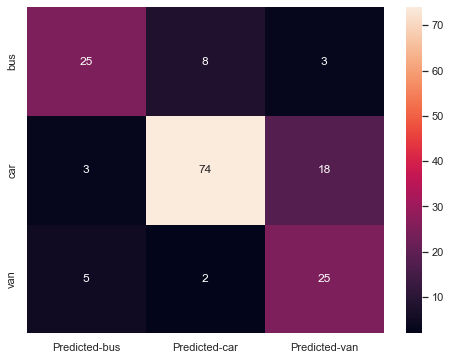

In [113]:
plot_confusion_matrix(y_test, predicted_labels_test)

#### Insights on the confusion matrix:

- Model correctly predicted 25 vehicle type as bus, 74 vehicle type as car and 25 vehicle type as van.
- Model incorrectly predicted 3 vehicle types as bus but those are car and 5 vehicle type as bus but those are van. 
- Model incorrectly predicted 8 vehicle type as car but those are bus and 2 vehicle type as car but those are van.
- Model incorrectly predicted 3 vehicle type as van but those are bus and 18 vehicle type as van but those are car.

In [114]:
print("classification  Metrics for test dataset:\n",classification_report(y_test,predicted_labels_test))

classification  Metrics for test dataset:
               precision    recall  f1-score   support

           0       0.76      0.69      0.72        36
           1       0.88      0.78      0.83        95
           2       0.54      0.78      0.64        32

    accuracy                           0.76       163
   macro avg       0.73      0.75      0.73       163
weighted avg       0.79      0.76      0.77       163



#### Insights on test data prediction: 
Precision: Out of all predicted values, what fraction are predicted correctly
Recall(sensitivity or TPR): Out of all actual values how much fraction we identified correctly

Model predicted correctly that the vehicle type as bus for 76% of the time, which is same as in training data.
<br>Model predicted correctly that the vehicle type as car for 88% of the time, which is very closer as in training data.
<br>Model predicted correctly that the vehicle type as van for 54% of the time, which is very low.

By F1 score we can say that precison and recall is balanced for vehicle type bus by 72%, for car by 83% and for van by 64%
Precision is higher for vehicle type car by 88% and f1-score is also higher for vehicle type car by 83% 

## 4. Performance Improvement: [5 Marks]
### A. Train another SVM on the components out of PCA. Tune the parameters to improve performance. [2 Marks]

In [115]:
from sklearn import svm
clf_linear = svm.SVC(kernel="linear", gamma=0.025, C=3) 

In [116]:
clf_linear.fit(X_train, y_train.values.ravel())

SVC(C=3, gamma=0.025, kernel='linear')

In [117]:
y_pred = clf_linear.predict(X_test)

In [118]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x]==predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [119]:
getAccuracy(y_test["class"].tolist(),y_pred)

64.41717791411043

In [120]:
def rbf_model(g,c):
    for gi in g:
        for ci in c:
            res={}
            clf_rbf = svm.SVC(kernel="rbf", gamma=gi, C=ci) 
            clf_rbf.fit(X_train, y_train.values.ravel())
            y_pred = clf_rbf.predict(X_test)
            acc=getAccuracy(y_test["class"].tolist(),y_pred)
            res["g"]=gi
            res["ci"]=ci
            res["acc"]=acc
            print(res) 

In [121]:
g=[0.025,0.05,0.075,0.1,0.2,0.5,0.7,1.0,2.0,3.0,4.0,5.0]
c=[1,3,5,7,9,11]
rbf_model(g,c)

{'g': 0.025, 'ci': 1, 'acc': 73.00613496932516}
{'g': 0.025, 'ci': 3, 'acc': 76.07361963190185}
{'g': 0.025, 'ci': 5, 'acc': 80.3680981595092}
{'g': 0.025, 'ci': 7, 'acc': 80.98159509202453}
{'g': 0.025, 'ci': 9, 'acc': 82.82208588957054}
{'g': 0.025, 'ci': 11, 'acc': 83.43558282208589}
{'g': 0.05, 'ci': 1, 'acc': 76.68711656441718}
{'g': 0.05, 'ci': 3, 'acc': 82.82208588957054}
{'g': 0.05, 'ci': 5, 'acc': 84.66257668711657}
{'g': 0.05, 'ci': 7, 'acc': 85.2760736196319}
{'g': 0.05, 'ci': 9, 'acc': 85.2760736196319}
{'g': 0.05, 'ci': 11, 'acc': 84.04907975460122}
{'g': 0.075, 'ci': 1, 'acc': 79.14110429447852}
{'g': 0.075, 'ci': 3, 'acc': 84.04907975460122}
{'g': 0.075, 'ci': 5, 'acc': 84.66257668711657}
{'g': 0.075, 'ci': 7, 'acc': 84.04907975460122}
{'g': 0.075, 'ci': 9, 'acc': 84.04907975460122}
{'g': 0.075, 'ci': 11, 'acc': 84.04907975460122}
{'g': 0.1, 'ci': 1, 'acc': 80.3680981595092}
{'g': 0.1, 'ci': 3, 'acc': 84.66257668711657}
{'g': 0.1, 'ci': 5, 'acc': 84.66257668711657}
{'g':

In [122]:
g=[0.025,0.05,0.075]
c=[13,15,17,19,21,23,25,30,35,40,45,50,60,70,80,90,100]
rbf_model(g,c)

{'g': 0.025, 'ci': 13, 'acc': 84.04907975460122}
{'g': 0.025, 'ci': 15, 'acc': 84.66257668711657}
{'g': 0.025, 'ci': 17, 'acc': 85.2760736196319}
{'g': 0.025, 'ci': 19, 'acc': 85.2760736196319}
{'g': 0.025, 'ci': 21, 'acc': 84.66257668711657}
{'g': 0.025, 'ci': 23, 'acc': 84.66257668711657}
{'g': 0.025, 'ci': 25, 'acc': 84.66257668711657}
{'g': 0.025, 'ci': 30, 'acc': 84.04907975460122}
{'g': 0.025, 'ci': 35, 'acc': 84.04907975460122}
{'g': 0.025, 'ci': 40, 'acc': 84.04907975460122}
{'g': 0.025, 'ci': 45, 'acc': 84.04907975460122}
{'g': 0.025, 'ci': 50, 'acc': 84.66257668711657}
{'g': 0.025, 'ci': 60, 'acc': 84.04907975460122}
{'g': 0.025, 'ci': 70, 'acc': 82.20858895705521}
{'g': 0.025, 'ci': 80, 'acc': 81.59509202453987}
{'g': 0.025, 'ci': 90, 'acc': 81.59509202453987}
{'g': 0.025, 'ci': 100, 'acc': 81.59509202453987}
{'g': 0.05, 'ci': 13, 'acc': 82.82208588957054}
{'g': 0.05, 'ci': 15, 'acc': 84.04907975460122}
{'g': 0.05, 'ci': 17, 'acc': 84.66257668711657}
{'g': 0.05, 'ci': 19, 'a

#### When kernel='rbf', gamma=0.05, C=7 the model score accuracy is 85.27%

### B. Share best Parameters observed from above step. [1 Marks]

In [123]:
clf_final = svm.SVC(kernel="rbf", gamma=0.05, C=7) 
clf_final.fit(X_train, y_train.values.ravel())
y_train_pred = clf_final.predict(X_train)
train_acc=getAccuracy(y_train["class"].tolist(),y_train_pred)
print("Train accuracy :{}".format(train_acc))

y_test_pred = clf_final.predict(X_test)
test_acc=getAccuracy(y_test["class"].tolist(),y_test_pred)
print("Test accuracy :{}".format(test_acc))

Train accuracy :84.15384615384616
Test accuracy :85.2760736196319


#### Insight: 
##### As we can see above, When kernel='rbf', gamma=0.05, C=7 the model score accuracy in train dataset is 84.15% and test data is 85.27%. Since this accuracy are close in train and test, the best parameters for SVM model are gamma=0.05, C=7 and  Kernel='rbf'

##### Before applying PCA, the score accuracy in test dataset is 97.54%. After applying PCA, though the score accuracy has reduced to 85.27%, when considering the advantages like reduced computation, avoiding overfit issues, better data visualization,etc the latest model after applying PCA can be finalized as optimal model for this dataset. 

### C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights. [2 Marks]

Confusion Matrix:


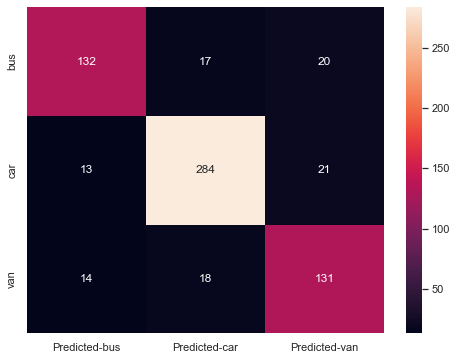

In [124]:
plot_confusion_matrix(y_train, y_train_pred)

#### Insights on the confusion matrix:

- Model correctly predicted 135 vehicle type as bus, 284 vehicle type as car and 131 vehicle type as van.
- Model incorrectly predicted 13 vehicle types as bus but those are car and 14 vehicle type as bus but those are van. 
- Model incorrectly predicted 17 vehicle type as car but those are bus and 18 vehicle type as car but those are van.
- Model incorrectly predicted 20 vehicle type as van but those are bus and 21 vehicle type as van but those are car.

In [125]:
print("classification  Metrics for train dataset:\n",classification_report(y_train,y_train_pred))

classification  Metrics for train dataset:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       169
           1       0.89      0.89      0.89       318
           2       0.76      0.80      0.78       163

    accuracy                           0.84       650
   macro avg       0.83      0.83      0.83       650
weighted avg       0.84      0.84      0.84       650



#### Insights on train data prediction: 
Precision: Out of all predicted values, what fraction are predicted correctly
Recall(sensitivity or TPR): Out of all actual values how much fraction we identified correctly

Model predicted correctly that the vehicle type as bus for 83% of the time.
<br>Model predicted correctly that the vehicle type as car for 89% of the time.
<br>Model predicted correctly that the vehicle type as van for 76% of the time.

By F1 score we can say that precison and recall is balanced for vehicle type bus by 80%, for car by 89% and for van by 80%
Precision is higher for vehicle type car by 89% and f1-score is also higher for vehicle type car by 89% 

Confusion Matrix:


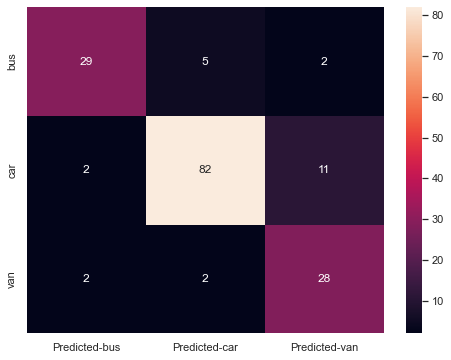

In [126]:
plot_confusion_matrix(y_test, y_test_pred)

#### Insights on the confusion matrix:

- Model correctly predicted 29 vehicle type as bus, 82 vehicle type as car and 28 vehicle type as van. The numbers have improved.
- Model incorrectly predicted 2 vehicle types as bus but those are car and 2 vehicle type as bus but those are van. Incorrect predictions have reduced.
- Model incorrectly predicted 5 vehicle type as car but those are bus and 2 vehicle type as car but those are van. Incorrect predictions have reduced.
- Model incorrectly predicted 2 vehicle type as van but those are bus and 11 vehicle type as van but those are car. Incorrect predictions have reduced.

In [127]:
print("classification  Metrics for test dataset:\n",classification_report(y_test,y_test_pred))

classification  Metrics for test dataset:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84        36
           1       0.92      0.86      0.89        95
           2       0.68      0.88      0.77        32

    accuracy                           0.85       163
   macro avg       0.83      0.85      0.83       163
weighted avg       0.87      0.85      0.86       163



#### Insights on test data prediction: 
Precision: Out of all predicted values, what fraction are predicted correctly
Recall(sensitivity or TPR): Out of all actual values how much fraction we identified correctly

Model predicted correctly that the vehicle type as bus for 88% of the time.
<br>Model predicted correctly that the vehicle type as car for 92% of the time.
<br>Model predicted correctly that the vehicle type as van for 68% of the time.

By F1 score we can say that precison and recall is balanced for vehicle type bus by 84%, for car by 89% and for van by 77%
Precision is higher for vehicle type car by 92% and f1-score is also higher for vehicle type car by 89% 

The scores have improved a lot compared to the base model.

## 5. Data Understanding & Cleaning: [5 Marks]
### A. Explain pre-requisite/assumptions of PCA. [2 Marks]


#### Pre-requisite/Assumptions of PCA:
Principal Component Analysis is a technique used in Unsupervised learning to identify most accurate data representation in lower dimension space. The main purpose of PCA is to reduce high dimensional data into low dimensional space. ML model with many inputs tend to overfit the model and also needs heavy computation to process all the input fields. PCA helps to reduce the number of input fields.
Below are pre-requisites/assumptions that need to be considered in PCA so as to have an optimal dimensionality reduction techinique:
- There should be a clear relationship between variables i.e if plotted in graph it will form a straight line. Linearity in the dataset is a primary pre-requisite to apply PCA.

- Outliers in the data should be less. The extreme values in the data will represent experimental errors and will degrade the model, meaning the model will be biased in datasets which has strong outliers. So outliers have to be removed before applying PCA.

- If the features are not correlated, then PCA will not be able to determine principal components.So having correlation between features is a pre-requisite for PCA.

- The features have to standarized before applying PCA. Because PCA is sensitive to scale of features. Features with higher values takes more precedence. PCA will be biased towards the feature with higher values. 

- PCA assumes there are no missing values in the feature set. So if there are any missing values, need to remove entry or impute with appropriate values. 

- Principal components with high variance are preferred over lower variance features. The lower variance features are disregarded as noise.  


### B. Explain advantages and limitations of PCA. [3 Marks]

#### Advantages:
- Principal Component Analysis is a technique used in Unsupervised learning to identify most accurate data representation in lower dimension space. ML model with many inputs tend to overfit the model and also needs heavy computation to process all the input fields. PCA helps to reduce the number of input fields. 
- PCA is based on linear algebra, which is computationally easy to solve by computers. 
- PCA improves data visualization with reduced dimensionality of features.
- Since the feature set is reduced, the computation of algorithm becomes easy comparitively. The ML algorithm converges faster when trained on the components derived by PCA instead of the original dataset with huge number of features. So the performance of algorithm improves with PCA.
- PCA helps to remove correlated attributes.

#### Limitations:
- Since PCA reduces the feature set, some level of information may be lost.
- Data standarization is a mandatory action before applying PCA.
- Principal components are linear combinations of the features from the original dataset, so it is difficult to interpret the final variables.
- PCA cannot work on features with non-linear releationship.
- PCA is not robust for outliers.
- PCA will be baised with non-standarized data.
    

# The END 